In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

import yfinance as yf

Now I need to read in all the seperated csvs

In [13]:
#Nike

Jordan84reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan84reg.csv')
Jordan84post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan84post.csv')

Jordan85reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan85reg.csv')
Jordan85post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan85post.csv')

Jordan86reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan86reg.csv')
Jordan86post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan86post.csv')

Jordan87reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan87reg.csv')
Jordan87post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan87post.csv')

Jordan88reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan88reg.csv')
Jordan88post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan88post.csv')

Jordan89reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan89reg.csv')
Jordan89post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan89post.csv')

Jordan90reg= pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan90reg.csv')
Jordan90post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan90post.csv')

Jordan91reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan91reg.csv')
Jordan91post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan91post.csv')

Jordan92reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan92reg.csv')
Jordan92post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan92post.csv')

Jordan94reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan94reg.csv')
Jordan94post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan94post.csv')

Jordan95reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan95reg.csv')
Jordan95post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan95post.csv')

Jordan96reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan96reg.csv')
Jordan96post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan96post.csv')


#---------------------------------------------------------------------------------------------------------------------
#Anta - Klay Thompson

Thompson13reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson13reg.csv')
Thompson13post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson13post.csv')

Thompson14reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson14reg.csv')
Thompson14post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson14post.csv')

Thompson15reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson15reg.csv')
Thompson15post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson15post.csv')

Thompson16reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson16reg.csv')
Thompson16post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson16post.csv')

Thompson17reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson17reg.csv')
Thompson17post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson17post.csv')

Thompson18reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson17reg.csv')
Thompson18post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson18post.csv')

Thompson21reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson21reg.csv')
Thompson21post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson21post.csv')



print('All Player Data Imported!')

All Player Data Imported!


Now that all data is imported, I want an all encompassing function that will clean the data to the specifications I want. The reg_and_post() function takes separate regular-season and postseason game logs and cleans, standardizes, and merges them into a single dataset ready for analysis. It begins by copying both input DataFrames to avoid altering the original data, then adds a postseason indicator column where regular-season games are marked as 0 and postseason games as 1. After concatenating the two datasets into one combined table, the function renames the ambiguous “Unnamed: 5” column to “home/away” and normalizes its values so that symbols like “@” and “at” are consistently labeled as “away,” with all other entries treated as “home.” It then removes non-game rows, such as headers, averages, and blank separators, by keeping only rows whose Rk column can be converted to a numeric value. The function also converts all dates into proper pandas datetime objects and drops any rows with invalid or missing dates. Next, it removes several unnecessary or problematic columns, including MP, Gcar, FT%, and percentage shooting columns that contain too many non-numeric or missing values (I contend this is fine because those columns won't have a large difference on the end result). The postseason column is then repositioned to appear earlier in the column order for better readability. Finally, all major statistical columns (such as PTS, AST, STL, BLK, GmSc, and others) are converted to numeric data types to ensure compatibility with calculations, correlations, and machine learning models. The result is a clean, consistent, analysis-ready game log that can be safely merged with stock data and used for modeling.

In [14]:
def reg_and_post(reg_df, post_df):
    """
    Combine regular season and postseason game logs, clean formatting,
    drop summary/header rows, normalize home/away, convert numeric columns,
    fix Thompson non-numeric Rk rows, and DROP MP, Gcar, FT%.
    """
    
    # ----- Copy inputs -----
    reg = reg_df.copy()
    post = post_df.copy()
    
    # ----- Add postseason indicator -----
    reg["postseason"] = 0
    post["postseason"] = 1
    
    # ----- Combine both seasons -----
    combined = pd.concat([reg, post], ignore_index=True)
    
    # ----- Rename Unnamed: 5 → home/away -----
    if "Unnamed: 5" in combined.columns:
        combined = combined.rename(columns={"Unnamed: 5": "home/away"})
    
    # ----- Normalize home/away -----
    if "home/away" in combined.columns:
        combined["home/away"] = combined["home/away"].replace({
            "@": "away",
            "at": "away",
            "": "home"
        }).fillna("home")
    
    # ----- KEEP ONLY NUMERIC Rk rows (drops: AVG, headers, blank rows) -----
    combined = combined[pd.to_numeric(combined['Rk'], errors='coerce').notna()]
    
    # ----- Convert Date -----
    combined["Date"] = pd.to_datetime(combined["Date"], errors="coerce")
    combined = combined[combined["Date"].notna()]   # drop rows with no real date
    
    # ----- DROP MP, Gcar, FT% -----
    drop_cols = ["MP", "Gcar", "FT%", "3P%", "2P%"]
    for col in drop_cols:
        if col in combined.columns:
            combined = combined.drop(columns=[col])
    
    # ----- Move postseason to column index 3 -----
    cols = list(combined.columns)
    cols.insert(3, cols.pop(cols.index("postseason")))
    combined = combined[cols]
    
    # ----- Numeric columns to convert -----
    float_cols = [
        'FG','FGA','FG%','3P','3PA','2P','2PA','eFG%',
        'FT','FTA','ORB','DRB','TRB','AST','STL','BLK','TOV','PF',
        'PTS','GmSc','+/-'
    ]
    
    for col in float_cols:
        if col in combined.columns:
            combined[col] = pd.to_numeric(combined[col], errors='coerce')
    
    return combined


Now that I have each year's cleaned dataset, I'll combine them into one bg data set for each player.

In [15]:
# Jordan
Jordan84 = reg_and_post(Jordan84reg, Jordan84post)
Jordan85 = reg_and_post(Jordan85reg, Jordan85post)
Jordan86 = reg_and_post(Jordan86reg, Jordan86post)
Jordan87 = reg_and_post(Jordan87reg, Jordan87post)
Jordan88 = reg_and_post(Jordan88reg, Jordan88post)
Jordan89 = reg_and_post(Jordan89reg, Jordan89post)
Jordan90 = reg_and_post(Jordan90reg, Jordan90post)
Jordan91 = reg_and_post(Jordan91reg, Jordan91post)
Jordan92 = reg_and_post(Jordan92reg, Jordan92post)
Jordan94 = reg_and_post(Jordan94reg, Jordan94post)
Jordan95 = reg_and_post(Jordan95reg, Jordan95post)
Jordan96 = reg_and_post(Jordan96reg, Jordan96post)



# Klay
Thompson13 = reg_and_post(Thompson13reg, Thompson13post)
Thompson14 = reg_and_post(Thompson14reg, Thompson14post)
Thompson15 = reg_and_post(Thompson15reg, Thompson15post)
Thompson16 = reg_and_post(Thompson16reg, Thompson16post)
Thompson17 = reg_and_post(Thompson17reg, Thompson17post)
Thompson18 = reg_and_post(Thompson18reg, Thompson18post)
Thompson21 = reg_and_post(Thompson21reg, Thompson21post)


JordanOverall = pd.concat([Jordan84, Jordan85, Jordan86, Jordan88, Jordan89, Jordan90, Jordan91, Jordan92, Jordan94, Jordan95, Jordan96])
ThompsonOverall = pd.concat([Thompson13, Thompson14, Thompson15, Thompson16, Thompson17, Thompson18, Thompson21])

In [16]:
JordanOverall.head()

,Rk,Gtm,Date,postseason,Team,home/away,Opp,Result,GS,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,1.0,1984-10-26,0,CHI,home,WSB,W 109-93,*,5.0,...,5.0,6.0,7.0,2.0,4.0,5.0,2.0,16.0,12.5,NaN
1,2.0,2.0,1984-10-27,0,CHI,away,MIL,L 106-108,*,8.0,...,2.0,5.0,5.0,2.0,1.0,3.0,4.0,21.0,19.4,NaN
2,3.0,3.0,1984-10-29,0,CHI,home,MIL,W 116-110,*,13.0,...,2.0,4.0,5.0,6.0,2.0,3.0,4.0,37.0,32.9,NaN
3,4.0,4.0,1984-10-30,0,CHI,away,KCK,W 109-104,*,8.0,...,2.0,4.0,5.0,3.0,1.0,6.0,5.0,25.0,14.7,NaN
4,5.0,5.0,1984-11-01,0,CHI,away,DEN,L 113-129,*,7.0,...,2.0,5.0,5.0,1.0,1.0,2.0,4.0,17.0,13.2,NaN


Using the yfinance package, I'm able to access historical stock data. I've added a column for returns to quickly know whether the stock increased or decreased throughout a given day.

In [17]:
### NIKE

# Get Nike's ticker symbol
data = yf.Ticker("NKE")

# period options: "1mo", "3mo", "6mo", "1y", "5y", "10y", "ytd", "max"
nike = data.history(period="max", interval="1d").reset_index()

nike['Date'] = pd.to_datetime(nike['Date']).dt.date

nike['Returns'] = (nike['Close'] - nike['Open']) / nike['Open']

nike.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
0,1980-12-02,0.123572,0.126258,0.123572,0.123572,100710400,0.0,0.0,-1.123053e-16
1,1980-12-03,0.122228,0.122228,0.120885,0.120885,25177600,0.0,0.0,-1.098836e-02
2,1980-12-04,0.124915,0.126258,0.124915,0.124915,22694400,0.0,0.0,1.110979e-16
3,1980-12-05,0.120885,0.120885,0.118199,0.118199,7590400,0.0,0.0,-2.222081e-02
4,1980-12-08,0.112826,0.112826,0.111483,0.111483,5414400,0.0,0.0,-1.191008e-02


In [18]:
### Anta

# Get Anta's ticker symbol
data = yf.Ticker("ANPDY")

# period options: "1mo", "3mo", "6mo", "1y", "5y", "10y", "ytd", "max"
anta = data.history(period="max", interval="1d").reset_index()

anta['Date'] = pd.to_datetime(anta['Date']).dt.date


anta['Returns'] = (anta['Close'] - anta['Open']) / anta['Open']

# Display the first few rows
anta.head()

#NEED TO CALCULATE RETURNS (look it up)
#Switch to 3 player daily data and specifically when layers sign, win mvp, win championship, score most points in a season, etc.
#t test between 30 days before and 30 days after

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
0,2013-01-07,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.0
1,2013-01-08,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.0
2,2013-01-09,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.0
3,2013-01-10,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.0
4,2013-01-11,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.0


In [19]:
# Shapes (dimensionality)
print("JordanOverall shape:", JordanOverall.shape)
print("ThompsonOverall shape:", ThompsonOverall.shape)
print("nike shape:", nike.shape)
print("anta shape:", anta.shape)

JordanOverall shape: (907, 30)
ThompsonOverall shape: (670, 30)
nike shape: (11345, 9)
anta shape: (3249, 9)


### Section 2: Exploratory Analysis

Previews each dataframe

In [20]:
# Peek at the first few rows
display(JordanOverall.head(),
ThompsonOverall.head(),
nike.head(),
anta.head())

,Rk,Gtm,Date,postseason,Team,home/away,Opp,Result,GS,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,1.0,1984-10-26,0,CHI,home,WSB,W 109-93,*,5.0,...,5.0,6.0,7.0,2.0,4.0,5.0,2.0,16.0,12.5,NaN
1,2.0,2.0,1984-10-27,0,CHI,away,MIL,L 106-108,*,8.0,...,2.0,5.0,5.0,2.0,1.0,3.0,4.0,21.0,19.4,NaN
2,3.0,3.0,1984-10-29,0,CHI,home,MIL,W 116-110,*,13.0,...,2.0,4.0,5.0,6.0,2.0,3.0,4.0,37.0,32.9,NaN
3,4.0,4.0,1984-10-30,0,CHI,away,KCK,W 109-104,*,8.0,...,2.0,4.0,5.0,3.0,1.0,6.0,5.0,25.0,14.7,NaN
4,5.0,5.0,1984-11-01,0,CHI,away,DEN,L 113-129,*,7.0,...,2.0,5.0,5.0,1.0,1.0,2.0,4.0,17.0,13.2,NaN


,Rk,Gtm,Date,postseason,Team,home/away,Opp,Result,GS,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,1.0,2013-10-30,0,GSW,home,LAL,W 125-94,*,15.0,...,2.0,3.0,1.0,0.0,0.0,1.0,3.0,38.0,30.1,30.0
1,2.0,2.0,2013-10-31,0,GSW,away,LAC,L 115-126,*,3.0,...,1.0,1.0,1.0,2.0,0.0,2.0,4.0,10.0,5.7,-13.0
2,3.0,3.0,2013-11-02,0,GSW,home,SAC,W 98-87,*,10.0,...,6.0,7.0,2.0,1.0,0.0,1.0,3.0,27.0,21.8,19.0
3,4.0,4.0,2013-11-04,0,GSW,away,PHI,W 110-90,*,5.0,...,2.0,3.0,2.0,2.0,0.0,1.0,3.0,15.0,10.7,38.0
4,5.0,5.0,2013-11-06,0,GSW,away,MIN,W 106-93,*,11.0,...,2.0,2.0,1.0,1.0,2.0,0.0,4.0,30.0,21.8,8.0


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
0,1980-12-02,0.123572,0.126258,0.123572,0.123572,100710400,0.0,0.0,-1.123053e-16
1,1980-12-03,0.122228,0.122228,0.120885,0.120885,25177600,0.0,0.0,-1.098836e-02
2,1980-12-04,0.124915,0.126258,0.124915,0.124915,22694400,0.0,0.0,1.110979e-16
3,1980-12-05,0.120885,0.120885,0.118199,0.118199,7590400,0.0,0.0,-2.222081e-02
4,1980-12-08,0.112826,0.112826,0.111483,0.111483,5414400,0.0,0.0,-1.191008e-02


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
0,2013-01-07,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.0
1,2013-01-08,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.0
2,2013-01-09,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.0
3,2013-01-10,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.0
4,2013-01-11,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.0


These show that there are some rows in the data that Jordan didn't start and just gives general information about the tables

In [21]:
# Data types and non-null counts
print("Jordan info:")
JordanOverall.info()
print("\nThompson info:")
ThompsonOverall.info()
print("\nNike info:")
nike.info()
print("\nAnta info:")
anta.info()

Jordan info:
<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 103
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Rk          907 non-null    float64       
 1   Gtm         907 non-null    float64       
 2   Date        907 non-null    datetime64[ns]
 3   postseason  907 non-null    int64         
 4   Team        907 non-null    object        
 5   home/away   907 non-null    object        
 6   Opp         907 non-null    object        
 7   Result      907 non-null    object        
 8   GS          896 non-null    object        
 9   FG          907 non-null    float64       
 10  FGA         907 non-null    float64       
 11  FG%         907 non-null    float64       
 12  3P          907 non-null    float64       
 13  3PA         907 non-null    float64       
 14  2P          907 non-null    float64       
 15  2PA         907 non-null    float64       
 16  eFG%        907 no

Fixes the games started column with consistent labeling

In [22]:
ThompsonOverall = ThompsonOverall[
    (ThompsonOverall['GS'] == '*') | (ThompsonOverall['GS'].isna())
]

I used the code below to find missing values and, if they didn't make sense to be missing, fixed them by either manipulating the missing values to take on values that made sense or were more parsable, or removed them since they wouldn't affect the end result.

In [23]:
#print("Missing in JordanOverall:\n", JordanOverall.isna().sum())
#print('----------------------')
#print("Missing in ThompsonOverall:\n", ThompsonOverall.isna().sum())
#print('----------------------')
#print("Missing in nike:\n", nike.isna().sum())
#print("Missing in anta:\n", anta.isna().sum())

For some context, here's a breakdown of why some common columns are missing or if they are left in, why the have some missing values:

home/away: 0 (we filled home/away)

GS: a few NaN values (normal)

3P%: missing when 3PA = 0 (also removed 2P%)

FT%: missing when FTA = 0

+/-: Jordan missing (not tracked in his era)

No MP (dropped)

No Gcar (dropped)

Giving a general overview of the tables with many many parameters.

In [24]:
perf_cols = ['PTS','TRB','AST','STL','BLK','TOV','PF','GmSc']

display(JordanOverall[perf_cols].describe(),
ThompsonOverall[perf_cols].describe())

,PTS,TRB,AST,STL,BLK,TOV,PF,GmSc
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,31.717751,6.436604,5.581036,2.434399,0.865491,2.850055,2.757442,25.015325
std,9.114900,3.033861,2.772618,1.625829,1.015112,1.769127,1.379700,8.636880
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.400000
25%,26.000000,4.000000,4.000000,1.000000,0.000000,2.000000,2.000000,19.150000
50%,32.000000,6.000000,5.000000,2.000000,1.000000,3.000000,3.000000,24.700000
75%,37.000000,8.000000,7.000000,3.000000,1.000000,4.000000,4.000000,30.500000
max,69.000000,19.000000,17.000000,9.000000,6.000000,8.000000,6.000000,64.600000


,PTS,TRB,AST,STL,BLK,TOV,PF,GmSc
count,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000
mean,20.497608,3.641148,2.371611,0.867624,0.550239,1.711324,2.031898,13.447528
std,7.710077,1.951594,1.586895,0.944137,0.753233,1.268159,1.412723,7.365992
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.200000
25%,15.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,8.400000
50%,20.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,12.900000
75%,25.000000,5.000000,3.000000,1.000000,1.000000,2.000000,3.000000,17.850000
max,60.000000,10.000000,8.000000,5.000000,5.000000,7.000000,6.000000,46.200000


In [25]:
display(nike[['Close','Returns']].describe(),
anta[['Close','Returns']].describe())

,Close,Returns
count,11345.000000,11345.000000
mean,24.826287,0.000431
std,36.388391,0.018498
min,0.073874,-0.177778
25%,1.168905,-0.008947
50%,5.730002,0.000000
75%,34.367798,0.009169
max,166.246826,0.166669


,Close,Returns
count,3249.000000,3249.000000
mean,173.073530,-0.000228
std,126.919494,0.012196
min,14.866037,-0.097657
25%,49.736774,-0.001856
50%,154.937424,0.000000
75%,269.023285,0.001860
max,566.662476,0.083425


Before diving into the bulk of my exploratory analysis, I wanted to take a step back to talk about my hypothesis and what I hope to accomplish with this project.

Hypothesis: I believe that the stock returns after a championship should on average be higher in the shortterm, hopefully with a window between 20-100 days so as to ot be too small or too large which would either be non-representative or capture too many factors.

Reasoning: In order for a return on the investment by invetng a line of shoes or merchandise into a player, it should make sense that the better that player does, the better the shoes/merch sells, in turn creating spikes in the stock after significant events involving that player (like a championship).

I'll start by doing some exploratory analysis so as to ascertain some trends with my data and any general information I can. As I do, I'll note any information I gain from whichever analysis I'm doing at the time.

Wanted to the distribution of points scored to potentially dive into the average return in games where Jordan or Thompson scored around a specific amount of points. It appeas as if that could be doable for Thompson scoring between 10-20 points, but I'm not sure it'd be useful. Outside of a slight spike around 18 PTS for Thompson, it appears as if most of these distributions are skewed right (common to have bad games, rarer to have really good ones)

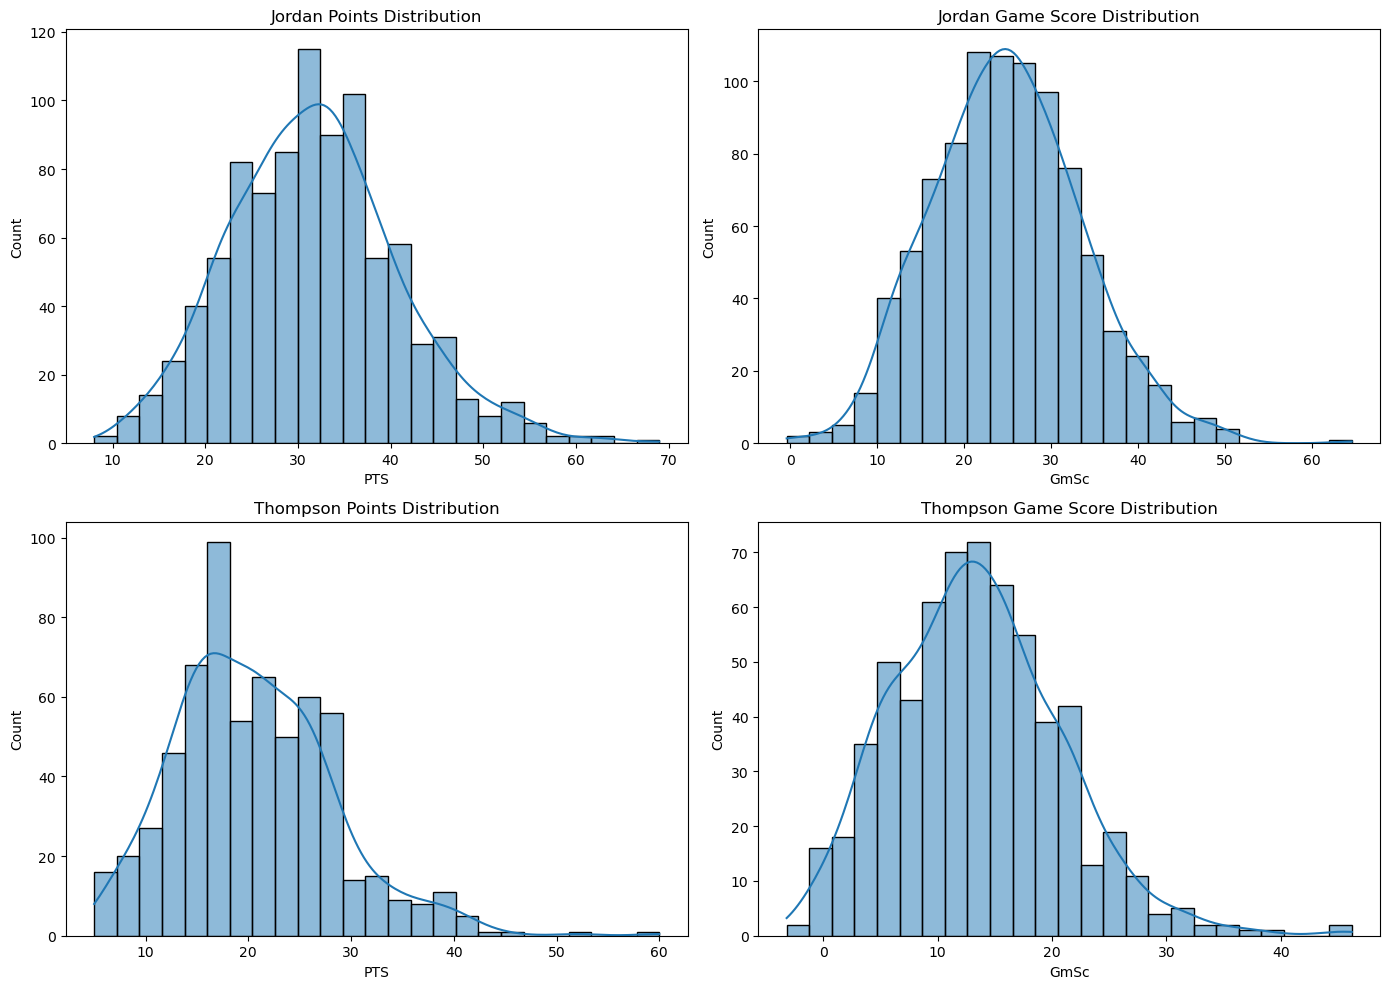

In [26]:
# Create 2x2 subplot grid for four charts
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Plot Jordan points histogram with KDE
sns.histplot(JordanOverall['PTS'], kde=True, bins=25, ax=axes[0,0])
axes[0,0].set_title("Jordan Points Distribution")

# Plot Jordan Game Score histogram with KDE
sns.histplot(JordanOverall['GmSc'], kde=True, bins=25, ax=axes[0,1])
axes[0,1].set_title("Jordan Game Score Distribution")

# Plot Thompson points histogram with KDE
sns.histplot(ThompsonOverall['PTS'], kde=True, bins=25, ax=axes[1,0])
axes[1,0].set_title("Thompson Points Distribution")

# Plot Thompson Game Score histogram with KDE
sns.histplot(ThompsonOverall['GmSc'], kde=True, bins=25, ax=axes[1,1])
axes[1,1].set_title("Thompson Game Score Distribution")

# Adjust layout spacing for clean display
plt.tight_layout()
plt.show()


In doing this, I just wanted to get some general information about perfoemance in regular season vs playoffs. From these graphs, I hypothesized that points and gamescore might be intrnally correlated which could eventually lead to some multicollinearity. All the charts are fairly normally distributed and while both have some right skewing for outlier overperformances, Thompson's distributions are much more skewed than Jordans (which is sensible because Jordan is considered one of the best players of all time while and specifically one of if not the best scorer of all time so havng more)

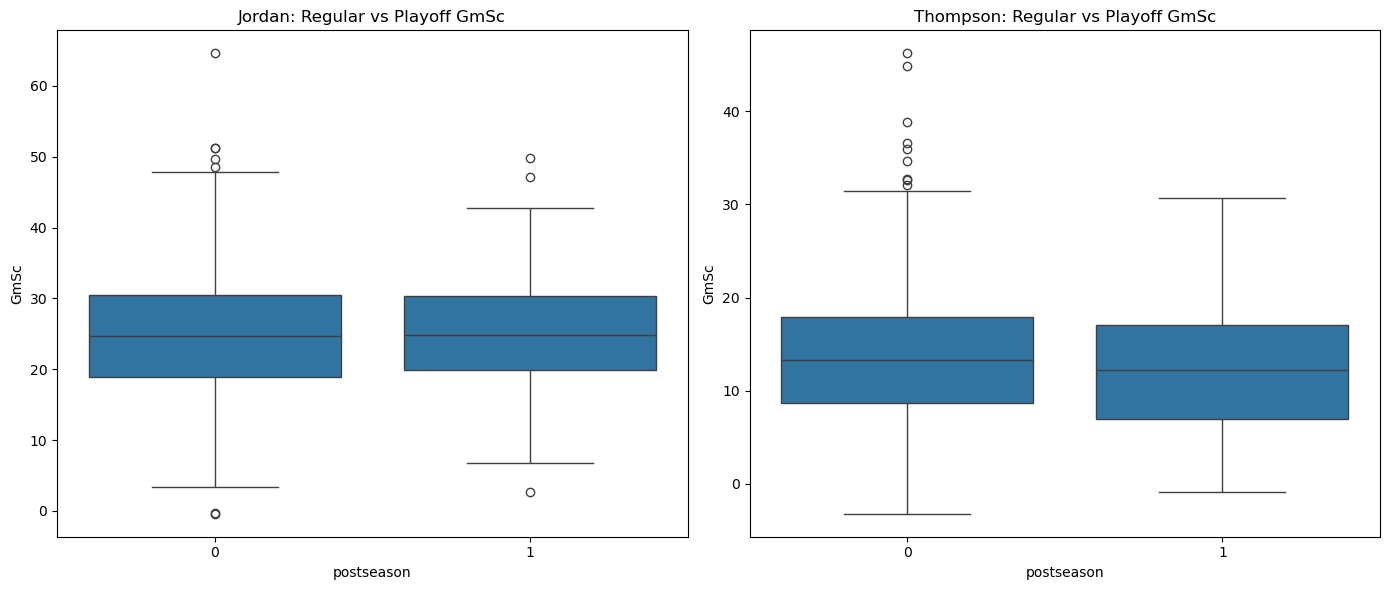

In [27]:
# Create 1x2 subplot grid for boxplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Plot Jordan GmSc by postseason status
sns.boxplot(data=JordanOverall, x='postseason', y='GmSc', ax=axes[0])
axes[0].set_title("Jordan: Regular vs Playoff GmSc")

# Plot Thompson GmSc by postseason status
sns.boxplot(data=ThompsonOverall, x='postseason', y='GmSc', ax=axes[1])
axes[1].set_title("Thompson: Regular vs Playoff GmSc")

# Adjust layout spacing for readability
plt.tight_layout()
plt.show()


To explore the aspect of outliers further, since my intuition may not have been correct, I wanted to visualize the distribution in a less noisy manner. These distributions back up the fact that, in the regular season, Klay Thompson has substantially more outlier performances. This is only important because Thompson's average gamescore is about 10 points lower than Jordan's, so the bar for him having an outlier is lower than it is for Jordan. Interestingly, Thompson has no outliers in the playoffs. However, when reintroducing the idea that Jordan's barrier for an outlier is higher, in this case, it further cements that Jordan is truly a legendary player.

For my next graph, I wanted to see a simple general overview of how the Nike and Anta prices hae increased over the years, looking for any major spikes that could potentially coincide with a specific event.

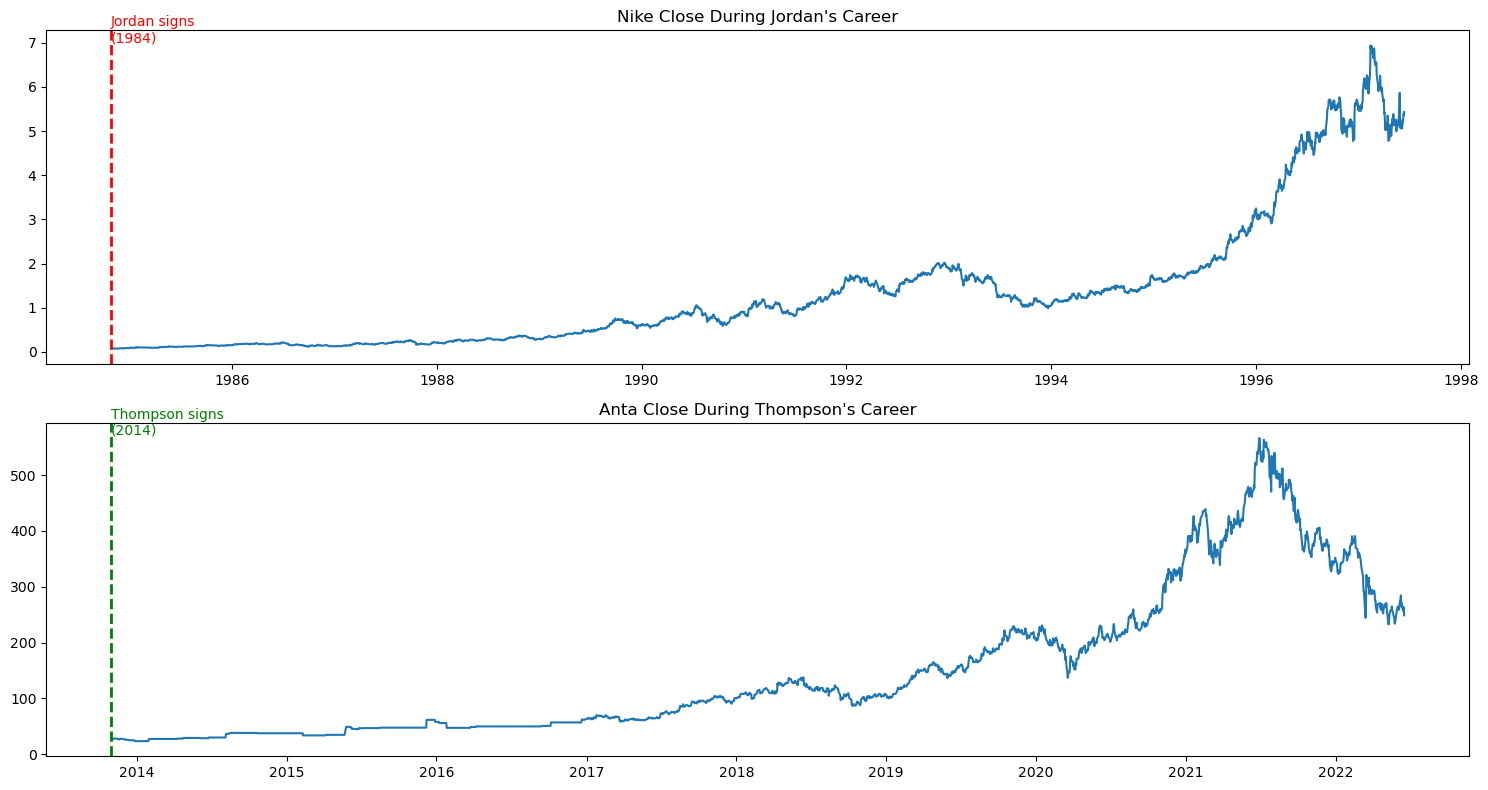

In [28]:
# Ensure all date columns are proper pandas Timestamps
JordanOverall['Date'] = pd.to_datetime(JordanOverall['Date'])
ThompsonOverall['Date'] = pd.to_datetime(ThompsonOverall['Date'])
nike['Date'] = pd.to_datetime(nike['Date'])
anta['Date'] = pd.to_datetime(anta['Date'])

# Filter periods
nike_jordan = nike[(nike['Date'] >= JordanOverall['Date'].min()) &
                   (nike['Date'] <= JordanOverall['Date'].max())]

anta_thompson = anta[(anta['Date'] >= ThompsonOverall['Date'].min()) &
                     (anta['Date'] <= ThompsonOverall['Date'].max())]

# Signing dates
jordan_sign_date = pd.to_datetime(JordanOverall['Date'].min())
thompson_sign_date = pd.to_datetime(ThompsonOverall['Date'].min())

fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Nike Plot
axes[0].plot(nike_jordan['Date'], nike_jordan['Close'], label="Close Price")
axes[0].axvline(jordan_sign_date, color='red', linestyle='--', linewidth=2)
axes[0].text(jordan_sign_date, 
             nike_jordan['Close'].max(), 
             "Jordan signs\n(1984)", 
             color='red', 
             ha='left', 
             va='bottom')

axes[0].set_title("Nike Close During Jordan's Career")

# Anta Plot
axes[1].plot(anta_thompson['Date'], anta_thompson['Close'], label="Close Price")
axes[1].axvline(thompson_sign_date, color='green', linestyle='--', linewidth=2)
axes[1].text(thompson_sign_date, 
             anta_thompson['Close'].max(), 
             "Thompson signs\n(2014)", 
             color='green', 
             ha='left', 
             va='bottom')

axes[1].set_title("Anta Close During Thompson's Career")

plt.tight_layout()
plt.show()


Just looking at these graphs, there is definitely an increase in total stock price after Jordan and Thompson's signings respectfully. However, plotting the championships will definitely show more. This will be done later on in this ipnyb.

Next, I wanted to see the distributions of returns to see if there was potentially a large similar amount of positive or negative return values which I could've looked into to see whether or not there were patterns in the games corrrepsonding to those days.

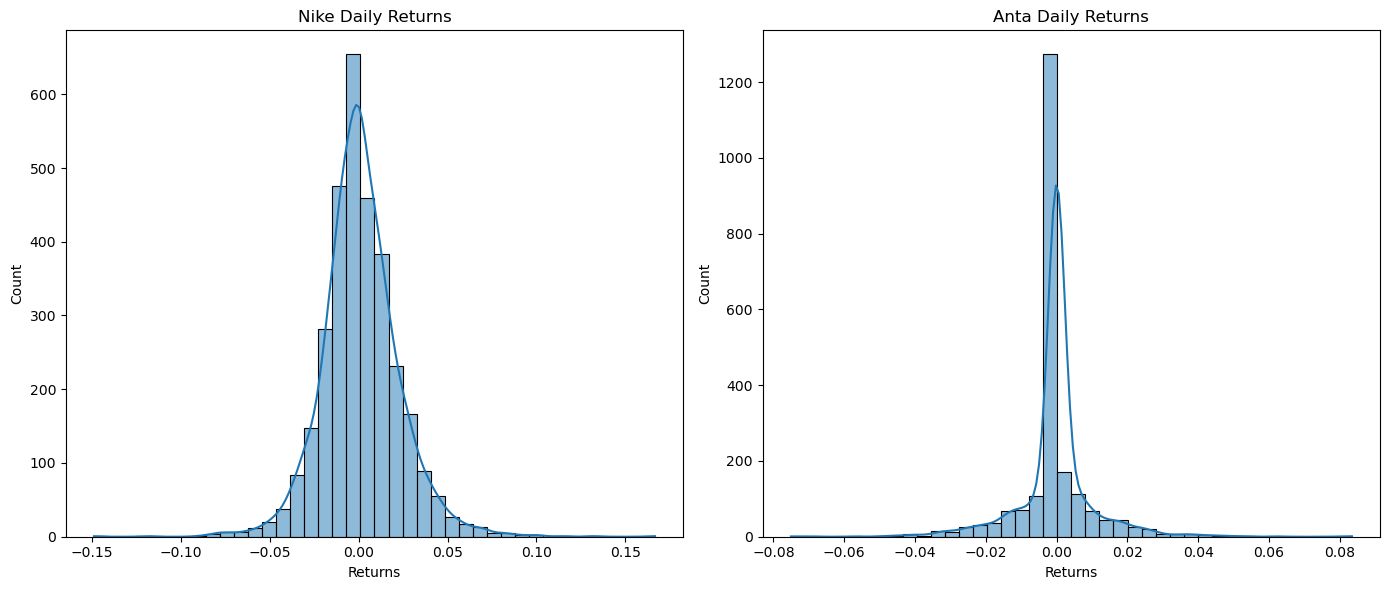

In [29]:
# Create 1x2 subplot grid for return histograms
fig, axes = plt.subplots(1,2,figsize=(14,6))

# Plot Nike returns histogram with KDE
sns.histplot(nike_jordan['Returns'], kde=True, bins=40, ax=axes[0])
axes[0].set_title("Nike Daily Returns")

# Plot Anta returns histogram with KDE
sns.histplot(anta_thompson['Returns'], kde=True, bins=40, ax=axes[1])
axes[1].set_title("Anta Daily Returns")

# Adjust spacing for clean layout
plt.tight_layout()
plt.show()


Unforunately, it appears both of these distrbutions are very normal with large peaks at 0, although Nike does have more of a descent whereas most of Anta's returns are 0. Therefore, if I choose to do prediction based modeling, based on these distributions of returns, many of the results will be 0, especially for Anta.

In [30]:
nike = nike.sort_values("Date")
anta = anta.sort_values("Date")

nike['NextReturn'] = nike['Returns'].shift(-1)
anta['NextReturn'] = anta['Returns'].shift(-1)

JordanMerged = JordanOverall.merge(
    nike[['Date','Returns','NextReturn']],
    on='Date', how='left'
)

ThompsonMerged = ThompsonOverall.merge(
    anta[['Date','Returns','NextReturn']],
    on='Date', how='left'
)

display(JordanMerged, ThompsonMerged)

,Rk,Gtm,Date,postseason,Team,home/away,Opp,Result,GS,FG,...,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Returns,NextReturn
0,1.0,1.0,1984-10-26,0,CHI,home,WSB,W 109-93,*,5.0,...,7.0,2.0,4.0,5.0,2.0,16.0,12.5,NaN,-0.031744,-0.016392
1,2.0,2.0,1984-10-27,0,CHI,away,MIL,L 106-108,*,8.0,...,5.0,2.0,1.0,3.0,4.0,21.0,19.4,NaN,NaN,NaN
2,3.0,3.0,1984-10-29,0,CHI,home,MIL,W 116-110,*,13.0,...,5.0,6.0,2.0,3.0,4.0,37.0,32.9,NaN,-0.016392,-0.016674
3,4.0,4.0,1984-10-30,0,CHI,away,KCK,W 109-104,*,8.0,...,5.0,3.0,1.0,6.0,5.0,25.0,14.7,NaN,-0.016674,-0.067792
4,5.0,5.0,1984-11-01,0,CHI,away,DEN,L 113-129,*,7.0,...,5.0,1.0,1.0,2.0,4.0,17.0,13.2,NaN,0.018181,0.017856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,15.0,15.0,1997-06-04,1,CHI,home,UTA,W 97-85,*,11.0,...,9.0,2.0,0.0,5.0,2.0,38.0,34.0,15.0,0.000000,-0.011211
903,16.0,16.0,1997-06-06,1,CHI,away,UTA,L 93-104,*,9.0,...,6.0,1.0,2.0,1.0,1.0,26.0,19.9,-10.0,0.011338,0.006623
904,17.0,17.0,1997-06-08,1,CHI,away,UTA,L 73-78,*,11.0,...,4.0,0.0,0.0,3.0,3.0,22.0,7.7,-6.0,NaN,NaN
905,18.0,18.0,1997-06-11,1,CHI,away,UTA,W 90-88,*,13.0,...,5.0,3.0,1.0,3.0,3.0,38.0,29.4,4.0,0.012903,-0.008475


,Rk,Gtm,Date,postseason,Team,home/away,Opp,Result,GS,FG,...,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Returns,NextReturn
0,1.0,1.0,2013-10-30,0,GSW,home,LAL,W 125-94,*,15.0,...,1.0,0.0,0.0,1.0,3.0,38.0,30.1,30.0,-0.002477,0.000000
1,2.0,2.0,2013-10-31,0,GSW,away,LAC,L 115-126,*,3.0,...,1.0,2.0,0.0,2.0,4.0,10.0,5.7,-13.0,0.000000,0.000000
2,3.0,3.0,2013-11-02,0,GSW,home,SAC,W 98-87,*,10.0,...,2.0,1.0,0.0,1.0,3.0,27.0,21.8,19.0,NaN,NaN
3,4.0,4.0,2013-11-04,0,GSW,away,PHI,W 110-90,*,5.0,...,2.0,2.0,0.0,1.0,3.0,15.0,10.7,38.0,0.000000,0.000000
4,5.0,5.0,2013-11-06,0,GSW,away,MIN,W 106-93,*,11.0,...,1.0,1.0,2.0,0.0,4.0,30.0,21.8,8.0,0.000268,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,18.0,18.0,2022-06-05,1,GSW,home,BOS,W 107-88,*,4.0,...,1.0,2.0,0.0,2.0,1.0,11.0,0.5,0.0,NaN,NaN
623,19.0,19.0,2022-06-08,1,GSW,away,BOS,L 100-116,*,7.0,...,3.0,1.0,1.0,0.0,1.0,25.0,20.2,-3.0,0.012233,-0.012392
624,20.0,20.0,2022-06-10,1,GSW,away,BOS,W 107-97,*,7.0,...,1.0,1.0,2.0,1.0,4.0,18.0,10.4,2.0,0.009771,0.000401
625,21.0,21.0,2022-06-13,1,GSW,home,BOS,W 104-94,*,7.0,...,2.0,2.0,0.0,1.0,4.0,21.0,15.7,13.0,0.000401,0.028672


Doesn't appear as if any single stat is heavily correlated with next day returns (although TOV is astonishingly similar to GmSc, which is used to represent how a good a given player's performance is in a game)

In [31]:
display(JordanMerged[['PTS','TRB','AST','STL','BLK','TOV','GmSc','Returns','NextReturn']].corr()['NextReturn'],
ThompsonMerged[['PTS','TRB','AST','STL','BLK','TOV','GmSc','Returns','NextReturn']].corr()['NextReturn'])


PTS           0.074422
TRB          -0.001515
AST          -0.024604
STL           0.009773
BLK          -0.027146
TOV           0.041570
GmSc          0.040531
Returns       0.122026
NextReturn    1.000000
Name: NextReturn, dtype: float64

PTS           0.045555
TRB          -0.021033
AST           0.058875
STL          -0.068039
BLK          -0.134759
TOV           0.051798
GmSc          0.025940
Returns       0.182729
NextReturn    1.000000
Name: NextReturn, dtype: float64

I wanted to turn these individuals into an easy to read map so I decided to create two heatmaps, one for Jordan and one for Thompson.

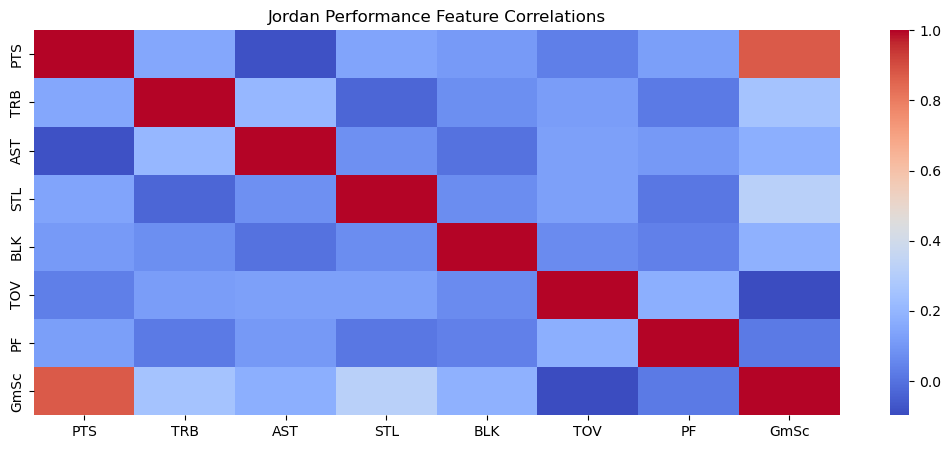

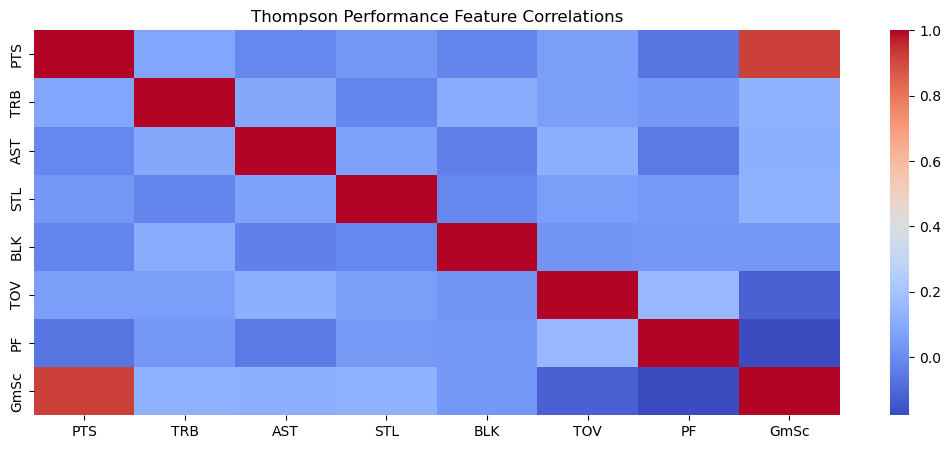

In [32]:
plt.figure(figsize=(13,5))
sns.heatmap(JordanOverall[perf_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Jordan Performance Feature Correlations")
plt.show()

plt.figure(figsize=(13,5))
sns.heatmap(ThompsonOverall[perf_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Thompson Performance Feature Correlations")
plt.show()

Based on this heat map, from the heat map, PTS and GmSc show a strong positive correlation, confirming that scoring is a major driver of overall game score.

In the coming couple weeks for this project, I want to explor specifically how the impact of major events, such as winning MVP, winning a championship, retiring, major injuries, etc all impact stock price. I'm contemplating using a test to test the average returns for a window X days before and after a given event. I'm also thinking of doing a knn to classify whether the next day's returns will be positive or negative based on the previous game day's stats. Regardless, I'm excited to dive in further.

In [33]:
def filter_by_year(df, start_year, end_year):
    """
    Filters a DataFrame to include only rows where 'Date' is between start_year and end_year (inclusive).
    
    Parameters:
        df (pd.DataFrame): DataFrame containing a 'Date' column.
        start_year (int): Starting year (inclusive).
        end_year (int): Ending year (inclusive).
    
    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    # Validate inputs
    assert isinstance(start_year, int), "start_year must be an integer"
    assert isinstance(end_year, int), "end_year must be an integer"
    assert 'Date' in df.columns, "DataFrame must contain a 'Date' column"

    # Make a copy to avoid modifying the original
    filtered = df.copy()
    
    # Ensure 'Date' is datetime
    filtered['Date'] = pd.to_datetime(filtered['Date'], errors='coerce')
    
    # Filter by year range
    filtered = filtered[
        (filtered['Date'].dt.year >= start_year) &
        (filtered['Date'].dt.year <= end_year)
    ]
    
    return filtered

The code below  prepares the Jordan dataset before merging it with Nike stock data. It first removes any rows where the date is missing and then groups the data by date, aggregating duplicate game days by summing the Game Score so each date appears only once. The Nike dataset is also cleaned to ensure all rows have valid dates. This step is necessary to align Jordan’s performance data with daily stock returns on a one-row-per-date basis.

In [34]:
JordanOverall = JordanOverall.dropna(subset=['Date'])

# Aggregate duplicate dates (sum or mean both work; sum is more typical for same-day games)
JordanOverallOrdered = (
    JordanOverall
    .groupby('Date', as_index=False)
    .agg({'GmSc': 'sum'})  # or 'mean'
)

# Ensure Nike data also has unique dates
nike = nike.dropna(subset=['Date'])
#nike_grouped_returns = nike.groupby('Date', as_index=False).agg({'Returns': 'mean'})
JordanOverall.head()


,Rk,Gtm,Date,postseason,Team,home/away,Opp,Result,GS,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,1.0,1984-10-26,0,CHI,home,WSB,W 109-93,*,5.0,...,5.0,6.0,7.0,2.0,4.0,5.0,2.0,16.0,12.5,NaN
1,2.0,2.0,1984-10-27,0,CHI,away,MIL,L 106-108,*,8.0,...,2.0,5.0,5.0,2.0,1.0,3.0,4.0,21.0,19.4,NaN
2,3.0,3.0,1984-10-29,0,CHI,home,MIL,W 116-110,*,13.0,...,2.0,4.0,5.0,6.0,2.0,3.0,4.0,37.0,32.9,NaN
3,4.0,4.0,1984-10-30,0,CHI,away,KCK,W 109-104,*,8.0,...,2.0,4.0,5.0,3.0,1.0,6.0,5.0,25.0,14.7,NaN
4,5.0,5.0,1984-11-01,0,CHI,away,DEN,L 113-129,*,7.0,...,2.0,5.0,5.0,1.0,1.0,2.0,4.0,17.0,13.2,NaN


This next block converts the date columns to proper datetime format, filters Nike data to only include dates before 1998, and normalizes Nike’s returns using z-scores so the values are comparable over time. It then aggregates both Jordan’s Game Scores and Nike’s returns into weekly averages to smooth out day-to-day noise and make long-term patterns easier to see. Finally, it creates a dual-axis scatterplot comparing Jordan’s weekly performance to Nike’s normalized weekly returns, aligns both y-axes around zero, and formats the plot for clarity.

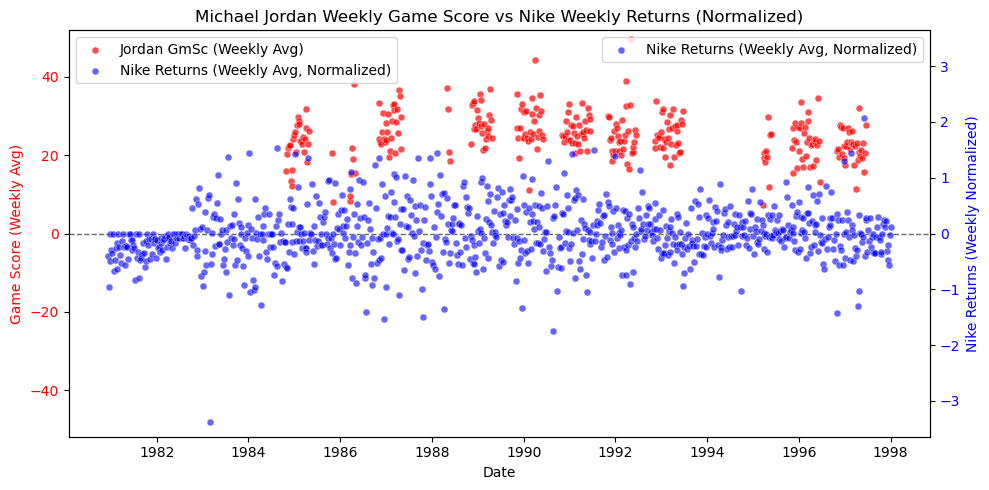

In [35]:
# --- Convert Date columns to datetime ---
JordanOverall['Date'] = pd.to_datetime(JordanOverall['Date'])
nike['Date'] = pd.to_datetime(nike['Date'])

# --- Filter Nike data before 1998 ---
nikefilter97 = nike[nike['Date'] < '1998-01-01'].copy()

# --- Normalize Nike returns (z-score normalization) ---
nikefilter97['Returns_norm'] = (nikefilter97['Returns'] - nikefilter97['Returns'].mean()) / nikefilter97['Returns'].std()

# --- Aggregate to weekly data ---
JordanWeekly = (
    JordanOverall
    .groupby(pd.Grouper(key='Date', freq='W'))  # Used to group on time-based interval
    .agg({'GmSc': 'mean'})
    .reset_index()
)

NikeWeekly = (
    nikefilter97
    .groupby(pd.Grouper(key='Date', freq='W'))  # Used to group on time-based interval
    .agg({'Returns_norm': 'mean'})
    .reset_index()
)

# --- Create figure and axes ---
fig, ax1 = plt.subplots(figsize=(10, 5))

# --- Scatterplot: Jordan Weekly GmSc ---
sns.scatterplot(
    data=JordanWeekly,
    x='Date',
    y='GmSc',
    color='red',
    s=25,
    alpha=0.7,
    label='Jordan GmSc (Weekly Avg)',
    ax=ax1
)
ax1.set_ylabel('Game Score (Weekly Avg)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# --- Scatterplot: Nike Weekly Normalized Returns ---
ax2 = ax1.twinx()
sns.scatterplot(
    data=NikeWeekly,
    x='Date',
    y='Returns_norm',
    color='blue',
    s=25,
    alpha=0.6,
    label='Nike Returns (Weekly Avg, Normalized)',
    ax=ax2
)
ax2.set_ylabel('Nike Returns (Weekly Normalized)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# --- Align both 0 baselines perfectly (centered) ---
y1_limit = max(abs(ax1.get_ylim()[0]), abs(ax1.get_ylim()[1]))
ax1.set_ylim(-y1_limit, y1_limit)

y2_limit = max(abs(ax2.get_ylim()[0]), abs(ax2.get_ylim()[1]))
ax2.set_ylim(-y2_limit, y2_limit)

# --- Add horizontal line at y=0 ---
ax1.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.6)

# --- Formatting ---
ax1.set_xlabel('Date')
plt.title('Michael Jordan Weekly Game Score vs Nike Weekly Returns (Normalized)')
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

In making this graph, I wanted to if exceptionally highly scored games overlapped with increased return days. While there appears to be slight overlap with increased positive stock returns, there are also increased negative returns along with it being very difficult to derive significance due to the noise of the graph. Because of this, I will not make this chart for Klay as well since I think there isn't much to gain, besides a nice visual.

In [36]:
#CumSum calculation

# --- Prepare Jordan data ---
JordanOverallOrdered = (
    JordanOverall
    .copy()
    .sort_values('Date')
    .groupby('Date', as_index=False)
    .agg({'GmSc': 'sum'})  # aggregate duplicates by date
)

JordanOverallOrdered['Cumulative_GmSc'] = JordanOverallOrdered['GmSc'].cumsum()
JordanOverallOrdered.head()

,Date,GmSc,Cumulative_GmSc
0,1984-10-26,12.5,12.5
1,1984-10-27,19.4,31.9
2,1984-10-29,32.9,64.8
3,1984-10-30,14.7,79.5
4,1984-11-01,13.2,92.7


Below, I made a graph and wanted to highlight 5 potential dates that I wanted to investigate. I eventually settled on 3, those being the first two championships Jordan won and the date he unretired. Regardless, for future reference, I wanted to still include the other 2 dates in case I ever came back to this project or if another person wanted to investigate something else. 

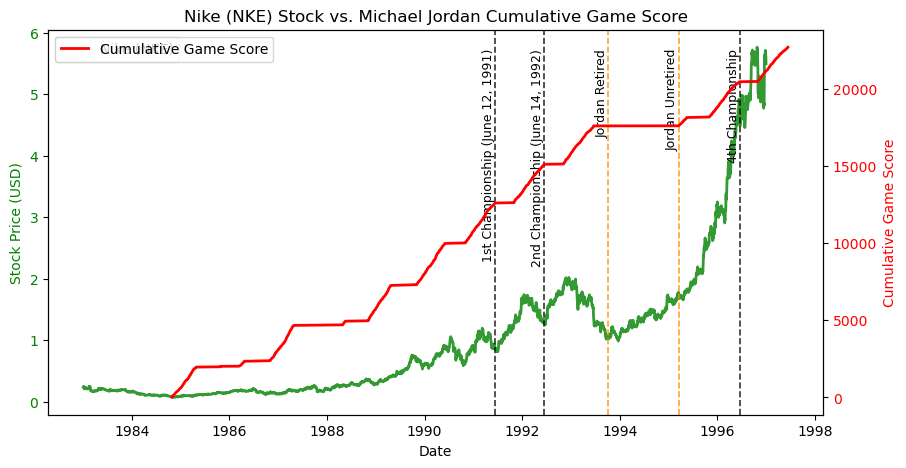

In [37]:
nikefiltered = filter_by_year(nike, 1983, 1996)

#  Create figure 
fig, ax1 = plt.subplots(figsize=(10, 5))

#  Nike stock price (left y-axis)---
sns.lineplot(
    data=nikefiltered,
    x='Date',
    y='Close',
    color='green',
    linewidth=2,
    alpha=0.8,
    label='Nike (NKE)',
    ax=ax1
)
ax1.set_ylabel("Stock Price (USD)", color='green')
ax1.tick_params(axis='y', labelcolor='green')

#  Cumulative GmSc (right y-axis) 
ax2 = ax1.twinx()
sns.lineplot(
    data=JordanOverallOrdered,
    x='Date',
    y='Cumulative_GmSc',
    color='red',
    linewidth=2,
    label='Cumulative Game Score',
    ax=ax2
)
ax2.set_ylabel("Cumulative Game Score", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Event Lines
dates = [
    #'May 25, 1988',   # First MVP
    #'March 28, 1990', # Career high 69 points
    'June 12, 1991',   # Won Championship
    'June 14, 1992',   # Won Championship
    #'June 20, 1993',
    #'July 23, 1993',   # Jordan's dad died
    'October 6, 1993',  # Jordan retired, revenue dropped 22% (https://www.essentiallysports.com/nba-legends-basketball-news-michael-jordan-nike-had-big-issues-after-company-suffered-massive-financial-loss-in-nineteen-ninety-three/?)
    'March 19, 1995',   # Jordan came back
    'June 16, 1996'    # Won Championship

]
labels = ['1st Championship (June 12, 1991)', '2nd Championship (June 14, 1992)', 'Jordan Retired', 'Jordan Unretired', '4th Championship']
event_dates = pd.to_datetime(dates)

for d, label in zip(event_dates, labels):
    color = 'darkorange' if 'retired' in label.lower() else 'black'

    ax1.axvline(x=d, color=color, linestyle='--', linewidth=1.2, alpha=0.8)
    ax1.text(d, ax1.get_ylim()[1]*0.95, label, rotation=90,
             va='top', ha='right', fontsize=9, color='black')

#  Styling 
plt.title("Nike (NKE) Stock vs. Michael Jordan Cumulative Game Score")
plt.show()

Below is my t-tests function. It takes in the stock_date, dates I want to investigate, the window to calculate the means for (basically the mean of returns X days before a given date, and the mean of returns X days after as well). It will do a t-test for each date provided, investigating the difference in the means for the specified window size before each date and after, while also calculating a confidence interval for each test.

In [38]:
from scipy.stats import ttest_ind, t

# Important Jordan dates
jordandates = ['June 12, 1991', # Won Championship 
               'June 14, 1992', # Won Championship 
               'March 19, 1995', # Jordan came back
                ]
               

# The main function, used to execute t-tests and associated confidence intervals.

def event_ttests(stock_data, event_dates, window_days=30, col='Close'):
    """
    Performs Welch (not Student) t-tests comparing mean values of `col` 
    before and after each event date within a specified window.
    Also returns 95% confidence intervals for the difference in means.
    """
    window = pd.Timedelta(days=window_days)
    results = []

    for date_str in event_dates:
        cutoff = pd.to_datetime(date_str)
        start_date = cutoff - window
        end_date = cutoff + window

        before = stock_data[(stock_data['Date'] >= start_date) & 
                            (stock_data['Date'] < cutoff)][col]

        after = stock_data[(stock_data['Date'] >= cutoff) & 
                           (stock_data['Date'] <= end_date)][col]

        # Welch t-test
        t_stat, p_val = ttest_ind(before, after, equal_var=False, nan_policy='omit') #Want Welch, not Student. Omit any NaN if there are any.

        # Means and standard deviations
        mean_before, mean_after = before.mean(), after.mean()
        std_before, std_after = before.std(), after.std()
        n1, n2 = len(before), len(after)

        if n1 < 2 or n2 < 2: # SAFEGUARD in case there aren't enough values
            results.append((cutoff, np.nan, np.nan, mean_before, mean_after, np.nan, np.nan, np.nan))
            continue

        # Difference in means
        diff = mean_after - mean_before # I want the difference to be postive if the mean after is postive and before is negative

        # Standard error
        se = np.sqrt((std_before**2 / n1) + (std_after**2 / n2))

        # Degrees of freedom
        df_num = (std_before**2 / n1 + std_after**2 / n2)**2
        df_den = ((std_before**2 / n1)**2 / (n1 - 1)) + ((std_after**2 / n2)**2 / (n2 - 1))
        df = df_num / df_den

        # 95% CI critical value
        t_crit = t.ppf(0.975, df)

        # CI bounds
        ci_low = diff - t_crit * se
        ci_high = diff + t_crit * se

        results.append((
            cutoff, 
            t_stat, 
            p_val, 
            mean_before, 
            mean_after, 
            diff,
            ci_low,
            ci_high
        ))

    return pd.DataFrame(results, columns=[
        'Date', 't-stat', 'p-value', 
        'Mean Before', 'Mean After', 
        'Difference (After - Before)',
        'CI Lower (95%)', 'CI Upper (95%)'
    ])


# Used the window_days found in the optimization in the next code box
display(event_ttests(nike, jordandates, window_days=31, col='Returns').iloc[2], 
        event_ttests(nike, jordandates, window_days=36, col='Returns').iloc[0],
        event_ttests(nike, jordandates, window_days=55, col='Returns').iloc[1])

Date                           1995-03-19 00:00:00
t-stat                                    1.977172
p-value                                   0.055028
Mean Before                               0.004673
Mean After                                -0.00237
Difference (After - Before)              -0.007043
CI Lower (95%)                           -0.014245
CI Upper (95%)                            0.000159
Name: 2, dtype: object

Date                           1991-06-12 00:00:00
t-stat                                   -2.373483
p-value                                   0.021643
Mean Before                              -0.009361
Mean After                                0.005363
Difference (After - Before)               0.014724
CI Lower (95%)                            0.002253
CI Upper (95%)                            0.027195
Name: 0, dtype: object

Date                           1992-06-14 00:00:00
t-stat                                   -2.566811
p-value                                   0.012264
Mean Before                              -0.004628
Mean After                                0.007615
Difference (After - Before)               0.012242
CI Lower (95%)                             0.00274
CI Upper (95%)                            0.021744
Name: 1, dtype: object

Looking at these results, I want to point out that even though the 1995 date is nearly significant, it's actually counter intuitive since it's going from an average returns that is positive to an average that is negative. By this point, Jordan's brand had become significantly well known and was associated with Nike regardless of whether or not he was playing (it had enough momentum prior to his retirement to keep itself selfsustaining). Furthermore, the confidence interval goes from negative to positive meaning the true value could be 0. However, when looking at the other two significant days, not only is the p-value significant, but the intervals 95% confidence intervals do not include zero, meaning even at the 5th percentile, there is still a non-zero change, further supporting significance.

Now, the graph below is the visualization of how I chose my window sizes.

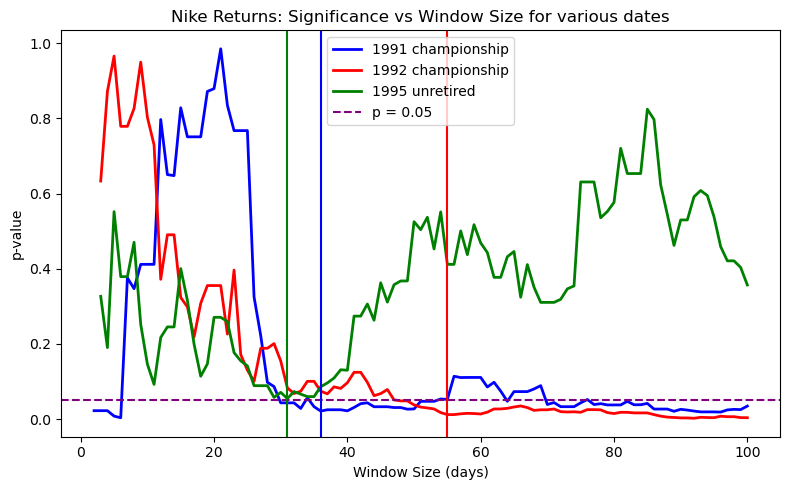

In [39]:
'''
For Reference:

jordandates = [
    'June 12, 1991',   # Won Championship
    'June 14, 1992',   # Won Championship
    'March 19, 1995',   # Jordan came back
]
'''

champ_1jordan = {}
champ_2jordan = {}
unretired = {}

for i in range(2, 101):
    df = event_ttests(nike, jordandates, window_days=i, col='Returns')
    champ_1jordan[i] = df.loc[0, 'p-value']
    champ_2jordan[i] = df.loc[1, 'p-value']
    unretired[i] = df.loc[2, 'p-value']

champ1_dfjordan = pd.DataFrame({
    'Window Size': list(champ_1jordan.keys()),
    'p-value': list(champ_1jordan.values())
})

champ2_dfjordan = pd.DataFrame({
    'Window Size': list(champ_2jordan.keys()),
    'p-value': list(champ_2jordan.values())
})

unretired_df = pd.DataFrame({
    'Window Size': list(unretired.keys()),
    'p-value': list(unretired.values())
})

plt.figure(figsize=(8,5))
sns.lineplot(data=champ1_dfjordan, x='Window Size', y='p-value', color='blue', linewidth=2, label = '1991 championship')
sns.lineplot(data=champ2_dfjordan, x='Window Size', y='p-value', color='red', linewidth=2, label = '1992 championship')
sns.lineplot(data=unretired_df, x='Window Size', y='p-value', color='green', linewidth=2, label = '1995 unretired')


plt.axhline(0.05, color='purple', linestyle='--', label='p = 0.05') # significance line

plt.title("Nike Returns: Significance vs Window Size for various dates")
plt.axvline(31, color='green')
plt.axvline(36, color='blue')
plt.axvline(55, color='red')
plt.xlabel("Window Size (days)")
plt.ylabel("p-value")
plt.legend()
plt.tight_layout()
plt.show()

This graph goes through all window sizes and the associating p-value, optimizng how many days I should look at for significance. By doing this, I ensure that at least one factor, given the other constraints, is as good as it can be. This makes my results more accurate. Furthermore, these window sizes are between 20 and 100, satisfying my hopeful condition within my hypothesis.

Next I'll redo the same things but for Klay Thompson.

Data prep:

In [40]:
#CumSum calculation

# Prepare Thompson data 
ThompsonOverallOrdered = (
    ThompsonOverall
    .copy()
    .sort_values('Date')
    .groupby('Date', as_index=False)
    .agg({'GmSc': 'sum'})  # aggregate duplicates by date
)

ThompsonOverallOrdered['Cumulative_GmSc'] = ThompsonOverallOrdered['GmSc'].cumsum()
ThompsonOverallOrdered

,Date,GmSc,Cumulative_GmSc
0,2013-10-30,30.1,30.1
1,2013-10-31,5.7,35.8
2,2013-11-02,21.8,57.6
3,2013-11-04,10.7,68.3
4,2013-11-06,21.8,90.1
...,...,...,...
549,2022-06-05,0.5,8384.6
550,2022-06-08,20.2,8404.8
551,2022-06-10,10.4,8415.2
552,2022-06-13,15.7,8430.9


Similar graph, just used to visualize potential significant dates.

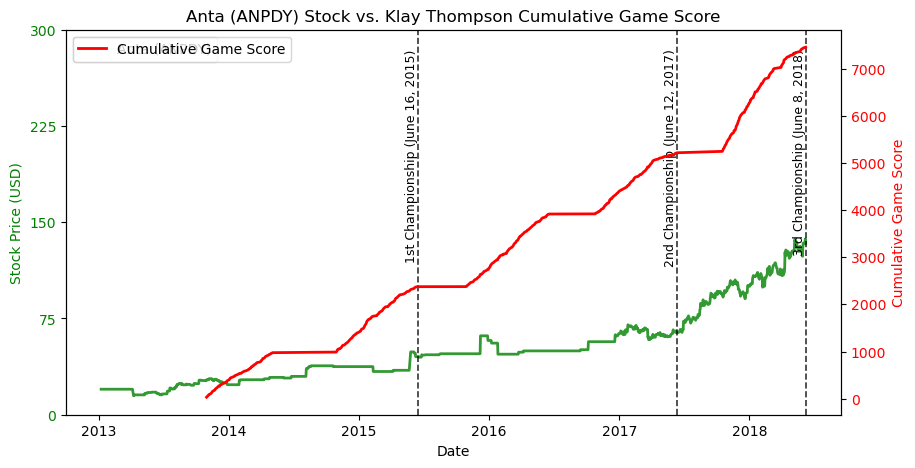

In [41]:
cutoff_date = pd.to_datetime('2018-06-08')
antafiltered = filter_by_year(anta, 2013, 20122)

#Filter up to that date
ThompsonOverallFiltered = ThompsonOverallOrdered[ThompsonOverallOrdered['Date'] <= cutoff_date]
antafiltered = antafiltered[antafiltered['Date'] <= cutoff_date]

#ThompsonOverallFiltered = ThompsonOverallOrdered[ThompsonOverallOrdered['Date'].dt.year <= 2017]

#  Create figure 
fig, ax1 = plt.subplots(figsize=(10, 5))

#  Anta stock price (left y-axis) 
sns.lineplot(
    data=antafiltered,
    x='Date',
    y='Close',
    color='green',
    linewidth=2,
    alpha=0.8,
    label='Anta (ANPDY)',
    ax=ax1
)

ax1.set_ylim(0, 300)
ax1.set_yticks([0, 75, 150, 225, 300])

ax1.set_ylabel("Stock Price (USD)", color='green')
ax1.tick_params(axis='y', labelcolor='green')

#  Cumulative GmSc (right y-axis) 
ax2 = ax1.twinx() # Creates a second y-axis
sns.lineplot(
    data=ThompsonOverallFiltered,
    x='Date',
    y='Cumulative_GmSc',
    color='red',
    linewidth=2,
    label='Cumulative Game Score',
    ax=ax2
)
ax2.set_ylabel("Cumulative Game Score", color='red')
ax2.tick_params(axis='y', labelcolor='red')

#  Event Lines 
dates = [
    'June 16, 2015',  # Won Championship
    'June 12, 2017', # Won Championship
    'June 8, 2018' # Won Championship
]


labels = ['1st Championship (June 16, 2015)', '2nd Championship (June 12, 2017)', '3rd Championship (June 8, 2018)']

event_dates = pd.to_datetime(dates)

for d, label in zip(event_dates, labels):
    color = 'darkorange' if 'retired' in label.lower() else 'black'

    ax1.axvline(x=d, color=color, linestyle='--', linewidth=1.2, alpha=0.8)
    ax1.text(d, ax1.get_ylim()[1]*0.95, label, rotation=90,
             va='top', ha='right', fontsize=9, color='black')

#  Styling 
plt.title("Anta (ANPDY) Stock vs. Klay Thompson Cumulative Game Score")
plt.show()

In [42]:
thompsondates = [
    'June 16, 2015',  # Won Championship
    'June 12, 2017',  # Won Championship
    'June 8, 2018'    # Won Championship
]

display(event_ttests(nike, thompsondates, window_days=28, col='Returns').iloc[2], 
        event_ttests(nike, thompsondates, window_days=52, col='Returns').iloc[1])

Date                           2018-06-08 00:00:00
t-stat                                    1.876191
p-value                                   0.068693
Mean Before                               0.004283
Mean After                                -0.00086
Difference (After - Before)              -0.005143
CI Lower (95%)                           -0.010702
CI Upper (95%)                            0.000415
Name: 2, dtype: object

Date                           2017-06-12 00:00:00
t-stat                                   -1.726118
p-value                                   0.089134
Mean Before                              -0.001746
Mean After                                0.002031
Difference (After - Before)               0.003777
CI Lower (95%)                           -0.000594
CI Upper (95%)                            0.008148
Name: 1, dtype: object

The results will be discussed in my inference section following shortly.

/opt/anaconda3/lib/python3.13/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


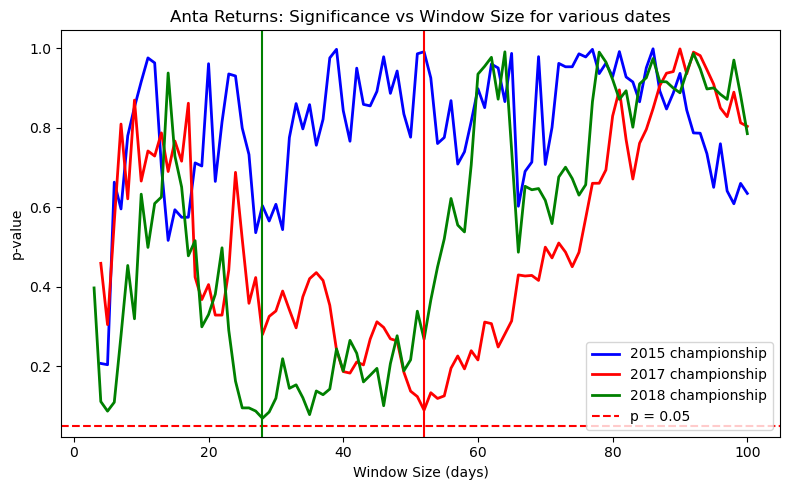

In [43]:
'''
For Reference:

thompsondates = [
    'June 16, 2015',  # Won Championship
    'June 12, 2017', # Won Championship
    'June 8, 2018' # Won Championship
]
'''

champ_1thomp = {}
champ_2thomp = {}
champ_3thomp = {}

for i in range(0, 101):
    df = event_ttests(nike, thompsondates, window_days=i, col='Returns')
    champ_1thomp[i] = df.loc[0, 'p-value']
    champ_2thomp[i] = df.loc[1, 'p-value']
    champ_3thomp[i] = df.loc[2, 'p-value']

champ1_dfthomp = pd.DataFrame({
    'Window Size': list(champ_1thomp.keys()),
    'p-value': list(champ_1thomp.values())
})

champ2_dfthomp = pd.DataFrame({
    'Window Size': list(champ_2thomp.keys()),
    'p-value': list(champ_2thomp.values())
})

champ3_dfthomp = pd.DataFrame({
    'Window Size': list(champ_3thomp.keys()),
    'p-value': list(champ_3thomp.values())
})

plt.figure(figsize=(8,5))
sns.lineplot(data=champ1_dfthomp, x='Window Size', y='p-value', color='blue', linewidth=2, label = '2015 championship')
sns.lineplot(data=champ2_dfthomp, x='Window Size', y='p-value', color='red', linewidth=2, label = '2017 championship')
sns.lineplot(data=champ3_dfthomp, x='Window Size', y='p-value', color='green', linewidth=2, label = '2018 championship')


plt.axhline(0.05, color='red', linestyle='--', label='p = 0.05') # significance line

plt.title("Anta Returns: Significance vs Window Size for various dates")
plt.xlabel("Window Size (days)")
plt.ylabel("p-value")
plt.axvline(28, color= "green")
plt.axvline(52, color= "red")
plt.legend()
plt.tight_layout()
plt.show()

### Section 3: Inference

In this section, I will go over all the inference I’ve gathered so far in a single location.

First, I’ll restate my hypothesis: I believe that the stock returns after a championship should on average be higher in the short term (ideally with a window between 20–100 days so as to not be too small or too large, which would either be non-representative or capture too many factors).

with the reasoning that in order for a return on the investment by invetng a line of shoes or merchandise into a player, that player does needs to perform in a significant way.

The corresponding null hypothesis, H₀: There is no connection between player performance and the stock of the company that sponsors them.

Prior to any investigation, I wanted to ensure my data was as clean as possible. To do this, I got rid of any columns that were negligible, investigated NaN values (to determine whether or not they were bad, actually made an impact, or didn’t matter), and eventually manipulated the following columns:

- home/away: 0 (we filled home/away)
- GS: a few NaN values (normal, sometimes post-injury players come off the bench)
- 3P%, 2P%: missing when == 0 (also would have been very correlated to FG%, which is more encompassing)
- FT%: missing when FTA = 0, wasn’t impactful
- +/-: Jordan missing (not tracked in his era)
- MP: dropped, negligible
- Gcar: dropped, negligible

**Now, onto my inference from my exploration**

In the beginning, I used several different graphs to pick apart my data, trying to find any feasible connection or avenue to gain a different view.

From the distributions of stock returns, I learned that:
- a large majority of the returns are 0.

From the distributions of points scored each game and game score of each game, I saw that:
- all of the game score and points-scored-per-game graphs are relatively normal and skewed left.

This second investigation led me to explore two other things:
1. Outlier performances
2. Multicollinearity

For the first, I created a boxplot for game score for both Jordan and Thompson. From this, I gathered that:
- Jordan has fewer outliers than Thompson, but that’s because his average performance is substantially better than Thompson’s, meaning that to have an outlier, he needed to have a world-class game. For Thompson, he still needed a great game, just not to the same degree as Jordan.

For the second, I wanted to see whether game score and points were heavily internally correlated based on the similarity of their distributions. To do this, I created a heatmap of my parameters. From that heatmap, it became apparent:
- that they are very correlated (this makes sense because points scored are a large portion of the formula for game score, but visualizing it not only made it easier to see that, but also just how much of an impact points scored has on game score).

**Now, for the t-test and its results**

From the results, it seems like all three are nearly significant. However, I want to restate that the 1995 date is shifting from a positive to a negative average. While Nike’s stock did eventually shoot back up, it was more delayed than the others (also, at this point, Jordan’s brand was nearly self-sustaining). Regardless, for both the 1991 and 1992 events, the p-values of 0.02 and 0.012 (respectively) suggest the difference in means is very significant. On top of this, neither of the two confidence intervals:

1991:

CI Lower (95%): 0.002253

CI Upper (95%): 0.027195

1992:

CI Lower (95%): 0.00274

CI Upper (95%): 0.021744

include 0, meaning even on the lowest end within the 95% confidence interval, the true value is not 0 — in turn saying that there is at least some impact, further supporting significance. This means that for Jordan, the null can be rejected for two (but nearly all) of the significant dates used and Ha, or that there is correlation between Jordan's performances and overall stock, can be accepted.

For Klay, it’s a different story. For 2015, there is no good p-value, so I can safely conclude there was no impact. For 2017, the lowest p-value I managed to achieve after optimizing was approximately 0.09. While this isn’t significant, it’s not totally insignificant either. For 2018, there were external impacts that introduced the same issue as in the Jordan analysis: the average changing significantly but going from positive to negative. For Klay, all of the confidence intervals included 0, meaning that it is not possible to rule out no impact. To elaborate on 2018, during 2018 and bleeding into 2019, a lot of Anta’s finances came under fire, which had negative stock implications.

**Assumptions**
For my project, I’m assuming that the direct impact a player has on the performance of their merchandise has extremely wide-ranging implications on the entire company’s stock.

In reality, while player performance likely has some impact on the stock as a whole, there are an extraordinarily large number of factors that go into a company’s stock such as politics, location, climate, production, products, sustainability, just to name a few. It would not be accurate to assume that there is direct causation here, but correlation does seem likely. However, with the results differing across multiple players, it would be important to widen the range of players and companies in order to incorporate more variance into my study. In saying this, I want to acknowledge that there are factors I’m not taking into account that could have caused the results that I achieved.

In conclusion, I would say that there definitely isn’t enough to establish causation, but that correlation between performance and stock price — especially early on in these companies’, specifically Nike’s, lifespans — is definitely apparent.

For my prediction portion, I chose to only focus on Nike stock since it's a substantially larger company and Jordan has been heralded as almost the sole reason Nike grew to its current size. While Klay was definitely a large impact for Anta, Anta's lesser size combined with the lack of statistically significant data meant that it wouldn't be meaningful to investigate. 

### Section 4: Prediction

This code first finds the earliest and latest game dates in the JordanOverall dataset, then filters the nike stock dataset to include only Nike returns within that same date range. It then merges Jordan’s game stats with Nike’s daily returns by matching on the Date column. The right merge keeps all Nike stock dates, even days where Jordan didn’t play, and attaches Jordan’s stats when they exist. The result is a combined dataset that aligns Jordan’s performance with Nike’s next-day return data for use in modeling.

In [44]:
latest_date = JordanOverall['Date'].sort_values(ascending=False).iloc[0] #oct 26 1984
earliest_date = JordanOverall['Date'].sort_values(ascending=False).iloc[-1] #june 13 1997

nike_datef = nike[
    (earliest_date <= nike['Date']) & 
    (nike['Date'] <= latest_date + pd.Timedelta(days=1))
]

jordan_nike_knn = JordanOverall.merge(
    nike_datef[['Date', 'Returns']], 
    on='Date',
    how='right'      # keep ALL dates & ALL returns from stock
)

jordan_nike_knn.head()

,Rk,Gtm,Date,postseason,Team,home/away,Opp,Result,GS,FG,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Returns
0,1.0,1.0,1984-10-26,0.0,CHI,home,WSB,W 109-93,*,5.0,...,6.0,7.0,2.0,4.0,5.0,2.0,16.0,12.5,NaN,-0.031744
1,3.0,3.0,1984-10-29,0.0,CHI,home,MIL,W 116-110,*,13.0,...,4.0,5.0,6.0,2.0,3.0,4.0,37.0,32.9,NaN,-0.016392
2,4.0,4.0,1984-10-30,0.0,CHI,away,KCK,W 109-104,*,8.0,...,4.0,5.0,3.0,1.0,6.0,5.0,25.0,14.7,NaN,-0.016674
3,NaN,NaN,1984-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.067792
4,5.0,5.0,1984-11-01,0.0,CHI,away,DEN,L 113-129,*,7.0,...,5.0,5.0,1.0,1.0,2.0,4.0,17.0,13.2,NaN,0.018181


For some context below, I chose to only do prediction for Jordan in regards to Nike rather than with Klay and Anta due to Jordan's widely known impact with Nike and the statistical significance achieved during the t-test.

This code builds a K-Nearest Neighbors model to predict whether Nike’s stock will go up or down the next day, based on Jordan’s game statistics. It first creates a binary target variable, cleans the data, splits it into training and testing sets, and standardizes all features so KNN can compare distances fairly. Then it tries every value of k from 1 to 150, trains a KNN model for each one, and records the accuracy on the test set. Finally, it identifies the best-performing k, prints the result, and plots accuracy versus k with a vertical line marking the optimal value.

New best found!  k=1, accuracy=0.5447
New best found!  k=6, accuracy=0.5610
New best found!  k=12, accuracy=0.5691
New best found!  k=24, accuracy=0.5772
New best found!  k=30, accuracy=0.5935
New best found!  k=87, accuracy=0.6016

Final best:
Best k: 87
Best accuracy: 0.6016


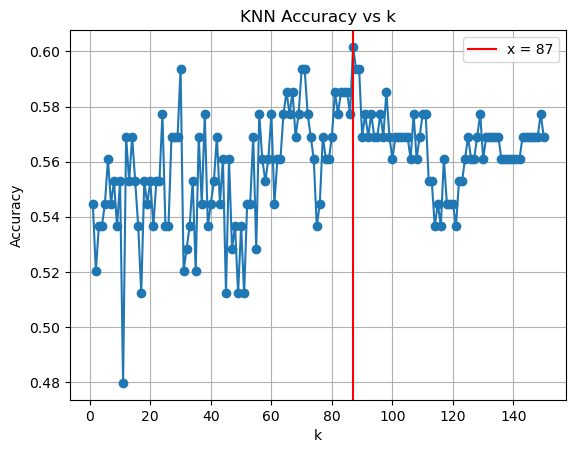

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

feature_cols = [
    'PTS','TRB','AST','STL','BLK','TOV','PF','GmSc','postseason'
]

# 1. Create target BEFORE dropping rows
jordan_nike_knn['Target'] = (jordan_nike_knn['Returns'].shift(-1) > 0).astype(int)

# 2. Drop rows that cannot be used
games_only = jordan_nike_knn.dropna(subset=feature_cols + ['Target'])

# 3. Extract features & labels
X = games_only[feature_cols]
y = games_only['Target']

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 5. Scale
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
k_values = range(1, 151)
accuracy_results = []

best_k = None
best_acc = -1

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_s, y_train)
    preds_temp = knn_temp.predict(X_test_s)
    acc = accuracy_score(y_test, preds_temp)

    accuracy_results.append((k, acc))

    # Live tracking
    if acc > best_acc:
        best_acc = acc
        best_k = k
        print(f"New best found!  k={best_k}, accuracy={best_acc:.4f}")

# final report
print("\nFinal best:")
print(f"Best k: {best_k}")
print(f"Best accuracy: {best_acc:.4f}")

# Plot
ks = [k for k, acc in accuracy_results]
accs = [acc for k, acc in accuracy_results]

plt.plot(ks, accs, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.grid(True)
plt.axvline(x=best_k, color='red', label=f'x = {best_k}')
plt.legend()
plt.show()


The best k will always be highlighted with a vertical red line with the highest accuracy printed by the code. This optimizes the k-value used in the KNN right below this cell. 

Accuracy: 0.6016260162601627
Confusion Matrix:
 [[64  6]
 [43 10]]


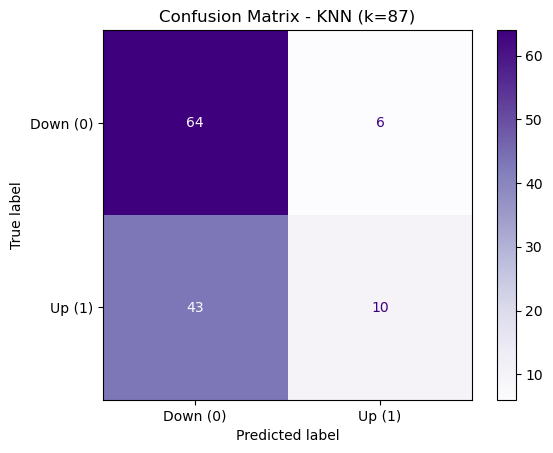

In [46]:
# START OF KNN
# Moved the rest of the steps above butt felt keeping the numbers the way 
# they were made sense to show the thought process

# 6. Train KNN
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_s, y_train)

# 7. Predict
preds = knn.predict(X_test_s)

# 8. Results
print("Accuracy:", accuracy_score(y_test, preds))

# Raw confusion matrix
cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:\n", cm)

# Confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Down (0)", "Up (1)"])
disp.plot(cmap="Purples")
plt.title(f"Confusion Matrix - KNN (k={best_k})")
plt.show()



My KNN's accuracy hovers around 60-61% which isn't super reliable, but isn't completely unreliable either. I will note that if my model predicts that the next days returns increase, it's typically highly likely to be true. However, it does tend to miscategorize a lot of postive return days as negative. However, while I wouldn't want to invest using this model, over an extended period of time if you traded on everything it said, it would be right approximately 60% of the time which would be profitable assuming the same amount of money was used each time. Again though, it's not causation and it's super highly accurate so I personally would not do it. In order to see if another model would be more accurate, I also wanted to do a logistic regression with the same goal in mind. 

New best C=0.00010 --> Accuracy=0.5691
New best C=0.00483 --> Accuracy=0.5772
New best C=0.01274 --> Accuracy=0.5854

Final best:
Best C: 0.012742749857031334
Best accuracy: 0.5854


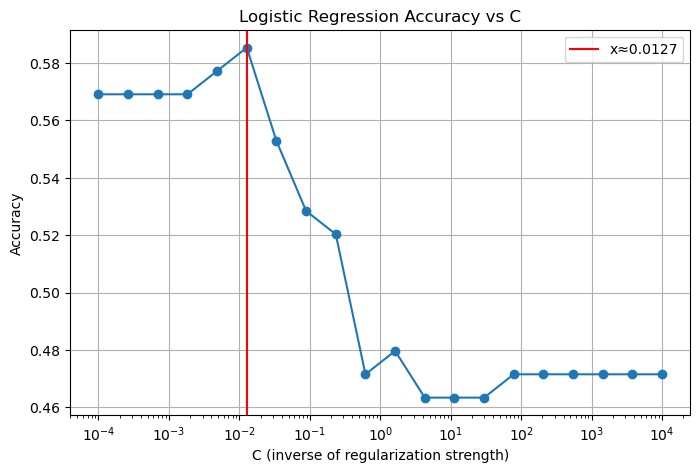

In [47]:
from sklearn.linear_model import LogisticRegression

C_values = np.logspace(-4, 4, 20)
accuracy_results = []

best_C = None
best_acc = -1

for C in C_values:
    model = LogisticRegression(
        penalty='l2',
        solver='lbfgs',
        max_iter=1000,
        C=C
    )
    model.fit(X_train_s, y_train)
    preds = model.predict(X_test_s)
    acc = accuracy_score(y_test, preds)

    accuracy_results.append((C, acc))

    # Live tracking
    if acc > best_acc:
        best_acc = acc
        best_C = C
        print(f"New best C={C:.5f} --> Accuracy={acc:.4f}") # Round as floating point

print("\nFinal best:")
print(f"Best C: {best_C}")
print(f"Best accuracy: {best_acc:.4f}")

# Plot
Cs = [C for C, acc in accuracy_results]
accs = [acc for C, acc in accuracy_results]

plt.figure(figsize=(8,5))
plt.plot(Cs, accs, marker='o') # plot with dotted tics
plt.xscale('log')  # REMEMBER: C should be plotted on log scale
plt.axvline(best_C, color='red', label=f'x≈{best_C.round(4)}')
plt.xlabel("C (inverse of regularization strength)")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy vs C")
plt.legend()
plt.grid(True)
plt.show()

This again is me optimizing the hyperparameter C, also known as the regularization strength, of my model. Since the optimal C is typically pretty close to 0, it means that limiting overfitting is important which makes due to some of my parameters being internally associated. I also chose to use L2 regularization because I didn't want to force my parameters to 0 and used lbfgs becuase my dataset is medium sized with a lot of parameters. Below is the actual logistic regression.

Accuracy: 0.5853658536585366
Confusion Matrix:
 [[64  6]
 [45  8]]


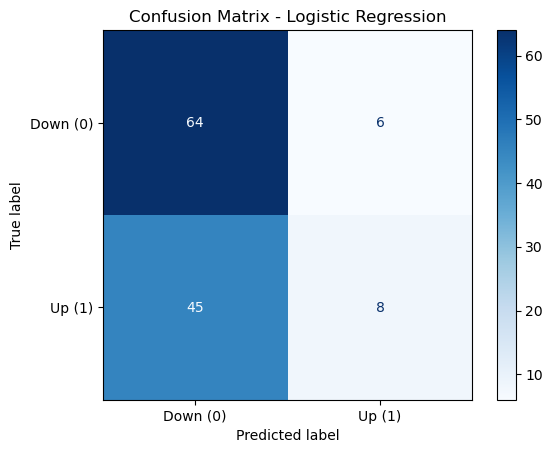

,Feature,Coefficient
0,PTS,0.100457
5,TOV,0.025594
7,GmSc,-0.006798
4,BLK,-0.009457
8,postseason,-0.009606
3,STL,-0.040334
6,PF,-0.045160
2,AST,-0.056132
1,TRB,-0.074102


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression

# 1. Create target BEFORE dropping rows
jordan_nike_knn['Target'] = (jordan_nike_knn['Returns'].shift(-1) > 0).astype(int)

# 2. Drop rows that cannot be used
df = jordan_nike_knn.dropna(subset=feature_cols + ['Target'])

# 3. Split features and labels
X = df[feature_cols]
y = df['Target']

# 4. Time-series split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 5. Scale
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 6. Logistic Regression
log_reg = LogisticRegression(
    penalty='l2', #to prevent overfitting with large values
    C=best_C,  # uses best_C found in previous step
    solver='lbfgs', # Best for medium sized dense data (also am using l1 regularization)
    max_iter=500
)
log_reg.fit(X_train_s, y_train)

# 7. Predict
preds = log_reg.predict(X_test_s)

# 8. Results
print("Accuracy:", accuracy_score(y_test, preds))

# Confusion Matrix (raw numbers)
cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:\n", cm)

# Confusion Matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["Down (0)", "Up (1)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Coefficient Table
coef_table = pd.DataFrame({
    "Feature": feature_cols,
    "Coefficient": log_reg.coef_[0]
}).sort_values("Coefficient", ascending=False)

coef_table


The accuracy for this model is typically 58%-59%, which again isn't very good. However, when printing the coefficients, the PTS feature is the most impactful to the predicitons given whereas TRB (total rebounds) seems to have the biggest impact for the next day returns to be negative. This seems counterintuitive which points to my model being flawed. This model's confusion matrix has very similar results to my KNN, over predciting negative returns but being fairly accurate the few times it does predict positive returns.

Overall, I would say that my prediction models aren't trustworthy enough to be used to form actual predictions, but that a player winning a championship is actually at least somewhat impactful to the sponsor's stock (shown by the p-values and the confidence intervals). However, it is also important to note that there are severe limitations to my model, especially the assumption that one player has a significant impact in their sponsors stock. While this may have been true for Jordan very early on in Nike's career since they were so new and his rise was very quick, in general one player isn't going to have a large, meaningful effect on the entire company's stock. Furthermore, I chose Jordan specifically because he was the principal sponsee of Nike so he would have a generalizable impact. Not only would trading on Jordan's game stats not work now since he's retired, but replicating this with one player currently in their career would be exceptionally difficult since usually many players are signed to the same company. If you were to take into account the performance of every sponsee and correlated it with company's stock, that might be more accurate, but would also be incredibly noisy and continue to leave out other important factors. These include policy, country of origin, market, tariffs, protests, COVID (at the time), and many more that also have significant implications in regard to a company's stock. That's all to say that performance and stock price are correlated, but there definitely isn't any causation. Similar with the predictive models, neither has enough data or parameters to be useful in trying to beat the market.